# Principal Component Analysis
Viewing it in terms, at what angle and spacing do we get max stress and have the longest crack length!

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import StandardScaler

## Reading data

In [5]:
from pandas import ExcelWriter
from pandas import ExcelFile

#Atul's Data: 
df= pd.read_excel('AtulData3.xlsx')
df

,Angle,Spacing,Max stress
0,50.97,9.0,0-50
1,50.97,5.0,0-50
2,53.54,5.6,0-50
3,53.54,6.6,0-50
4,53.54,4.6,0-50
...,...,...,...
85,50.00,15.0,>200
86,50.00,10.0,>200
87,50.00,5.0,>200
88,60.00,5.0,>200


### Setting x array as independent features; Y- array as class column values
X data: stored as 90x2 columns -> 2D vector 

In [6]:
X= df. iloc[:, 0:2].values 
X

array([[50.97,  9.  ],
       [50.97,  5.  ],
       [53.54,  5.6 ],
       [53.54,  6.6 ],
       [53.54,  4.6 ],
       [60.  ,  5.  ],
       [47.36,  4.19],
       [45.  ,  5.  ],
       [47.36,  5.58],
       [33.54,  6.6 ],
       [33.54,  5.6 ],
       [60.  , 10.  ],
       [43.54,  6.6 ],
       [60.  ,  7.5 ],
       [45.  ,  7.5 ],
       [45.  , 10.  ],
       [43.54,  5.6 ],
       [50.  , 10.  ],
       [33.54,  4.6 ],
       [50.  ,  7.5 ],
       [20.  ,  5.  ],
       [50.  ,  5.  ],
       [43.54,  4.6 ],
       [45.  ,  5.  ],
       [20.  ,  7.5 ],
       [45.  , 10.  ],
       [47.36,  2.79],
       [45.  ,  7.5 ],
       [65.  ,  5.  ],
       [65.  ,  7.  ],
       [30.  , 10.  ],
       [30.  ,  7.5 ],
       [30.  ,  5.  ],
       [50.97,  5.58],
       [50.97,  4.19],
       [20.  , 10.  ],
       [55.  ,  5.58],
       [55.  ,  4.19],
       [50.97,  2.79],
       [55.  ,  2.79],
       [40.  ,  5.  ],
       [40.  , 15.  ],
       [40.  , 10.  ],
       [50.

In [7]:
# Y contains angle
Y= df.iloc[:,2].values
Y


array(['0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50',
       '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50',
       '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50',
       '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50',
       '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50', '0-50',
       '50-100', '50-100', '50-100', '50-100', '50-100', '50-100',
       '50-100', '50-100', '50-100', '50-100', '50-100', '50-100',
       '50-100', '50-100', '50-100', '50-100', '50-100', '50-100',
       '50-100', '50-100', '50-100', '50-100', '50-100', '50-100',
       '50-100', '100-150', '100-150', '100-150', '100-150', '100-150',
       '100-150', '100-150', '100-150', '150-200', '150-200', '150-200',
       '150-200', '150-200', '150-200', '>200', '>200', '>200', '>200',
       '>200', '>200', '>200', '>200', '>200', '>200', '>200'],
      dtype=object)

In [8]:
#Z contains spacing 
#Z= df. iloc[:,3].values
#Z

## Dimensionality Reduction and PCA

### Standardization
Transformation of data onto the unit scale: Mean=0, Variance=1 X_

In [9]:
X_Std = StandardScaler().fit_transform(X)

In [10]:
X_Std

array([[ 0.12774483,  1.0815629 ],
       [ 0.12774483, -0.39095296],
       [ 0.29417143, -0.17007558],
       [ 0.29417143,  0.19805338],
       [ 0.29417143, -0.53820455],
       [ 0.71250444, -0.39095296],
       [-0.1060295 , -0.68913742],
       [-0.25885704, -0.39095296],
       [-0.1060295 , -0.17743816],
       [-1.00097722,  0.19805338],
       [-1.00097722, -0.17007558],
       [ 0.71250444,  1.44969186],
       [-0.35340289,  0.19805338],
       [ 0.71250444,  0.52936945],
       [-0.25885704,  0.52936945],
       [-0.25885704,  1.44969186],
       [-0.35340289, -0.17007558],
       [ 0.06493012,  1.44969186],
       [-1.00097722, -0.53820455],
       [ 0.06493012,  0.52936945],
       [-1.87779285, -0.39095296],
       [ 0.06493012, -0.39095296],
       [-0.35340289, -0.53820455],
       [-0.25885704, -0.39095296],
       [-1.87779285,  0.52936945],
       [-0.25885704,  1.44969186],
       [-0.1060295 , -1.20451797],
       [-0.25885704,  0.52936945],
       [ 1.0362916 ,

### Eigen Decomposition 
Compute Eigen vactors and eigen values 
#### 1. Covariance Matrix

In [11]:
print('Covariance matrix \n')
cov_mat= np.cov(X_Std, rowvar= False)
cov_mat

Covariance matrix 



array([[ 1.01123596, -0.13094203],
       [-0.13094203,  1.01123596]])

#### 2. Eigenvectors and Eigenvalues computation from Covariance matrix

In [12]:
cov_mat = np.cov(X_Std.T)
eig_vals, eig_vecs= np.linalg. eig(cov_mat)
print('Eigenvactors \n %s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvactors 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues 
[1.14217798 0.88029393]


#### 3. Eigen vector verification

In [13]:
sq_eig= [] 
for i in eig_vecs: sq_eig.append(i**2)
print(sq_eig)
sum(sq_eig)
print ("sum of squares of each values in an eigen vector is",0.3466047+ 0.3713541+ 0.2820412 )
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))

[array([0.5, 0.5]), array([0.5, 0.5])]
sum of squares of each values in an eigen vector is 1.0


### 3. Selecting the Principal Components
PCA goal: Reduce dimensionality
#### 3.1 Sorting eigenvalues 
Eigen-vectors to be dropped: Lowest eigen values with least info about distribution 

In [14]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])
for i in range(len(eig_vals))]
print(type(eig_pairs))

#sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print("\n", eig_pairs)

#Visually confirm that list is correctly sorted by descending eigenvalues
print('\n \nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

<class 'list'>

 [(1.1421779822308413, array([ 0.70710678, -0.70710678])), (0.8802939278815177, array([0.70710678, 0.70710678]))]

 
Eigenvalues in descending order:
1.1421779822308413
0.8802939278815177


#### 3.2 Explained Variance
How many principal components are we choosing for our new feature subspace? 

In [15]:
tot = sum(eig_vals)
print("\n", tot)
var_exp= [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
print("\n\n1. Variance Explained \n", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained \n", cum_var_exp)
print("\n\n3. Percentage of variance the first two princiapl components each contain\n ", var_exp[0:2])
print("\n\n4. Percentage of variance the first two principal components together contain\n", sum(var_exp[0:2]))


 2.022471910112359


1. Variance Explained 
 [56.4743557880805, 43.5256442119195]


2. Cumulative Variance Explained 
 [ 56.47435579 100.        ]


3. Percentage of variance the first two princiapl components each contain
  [56.4743557880805, 43.5256442119195]


4. Percentage of variance the first two principal components together contain
 100.0


### 4. Construct the variance matrix W from the selected k eigenvectors 

In [16]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
#hstack: Stacks arrays in sequence horizontally (columnwise).
print ('Matrix W:\n', matrix_w)

[ 0.70710678 -0.70710678]
[0.70710678 0.70710678]
Matrix W:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


## 5. Projection onto the new feature space 
3x2 dimensional projection matrix W to transform onto the new subspace 

In [17]:
y= X_Std.dot(matrix_w)
principalDf = pd.DataFrame(data=y, columns = ['Principal component 1', 'Principal component 2'])
principalDf.head()

,Principal component 1,Principal component 2
0,-0.674451,0.855110
1,0.366775,-0.186116
2,0.328272,0.087749
3,0.067966,0.348056
4,0.588579,-0.172557


In [19]:
#Y.shape
finalDf = pd.concat([principalDf, pd.DataFrame(Y,columns = ['Max crack tip stress'])], axis =1)
finalDf.head()

,Principal component 1,Principal component 2,Max crack tip stress
0,-0.674451,0.855110,0-50
1,0.366775,-0.186116,0-50
2,0.328272,0.087749,0-50
3,0.067966,0.348056,0-50
4,0.588579,-0.172557,0-50


### 6. Visualize 2D Projection
a. Angle (y)
b. Spacing (z)

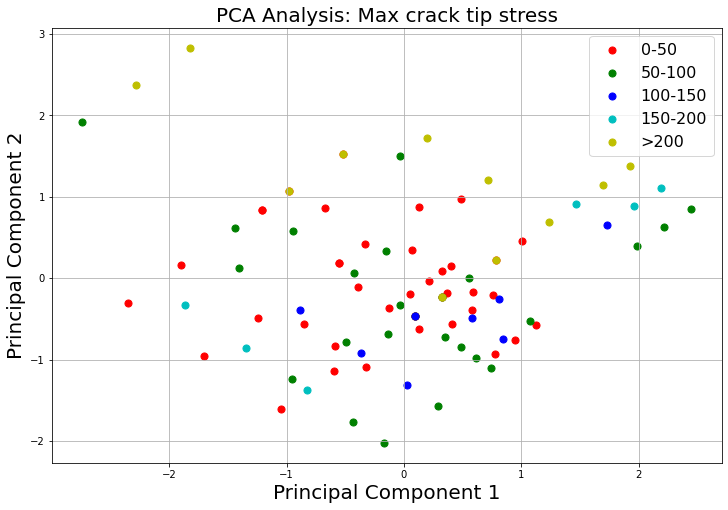

In [23]:
fig= plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('PCA Analysis: Max crack tip stress', fontsize= 20)

targets = ['0-50','50-100','100-150', '150-200', '>200']
colors = ['r','g', 'b', 'c', 'y']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Max crack tip stress'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1'], finalDf.loc[indicesToKeep, 'Principal component 2'],c= color, s=50) 
ax.legend(targets,loc=1, prop={'size': 16}) 
ax.grid()
#plt.plot(principalDf.iloc[:,0], principalDf.iloc[:,1], 'o');


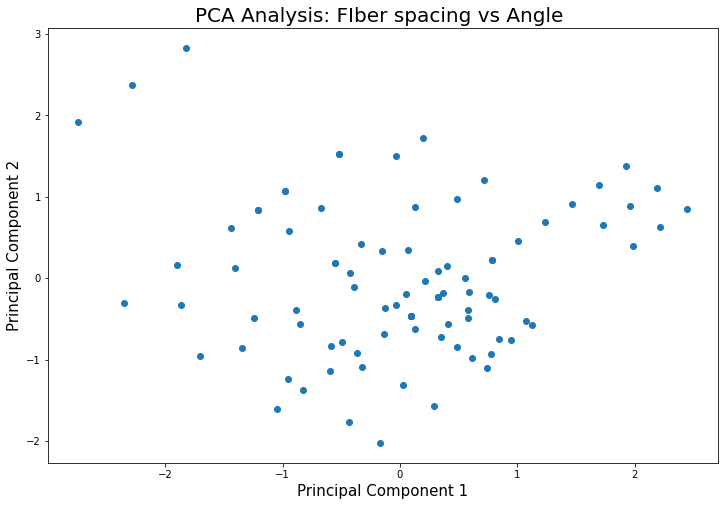

In [24]:
fig= plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Analysis: FIber spacing vs Angle ', fontsize= 20)

plt.plot(principalDf.iloc[:,0], principalDf.iloc[:,1], 'o');

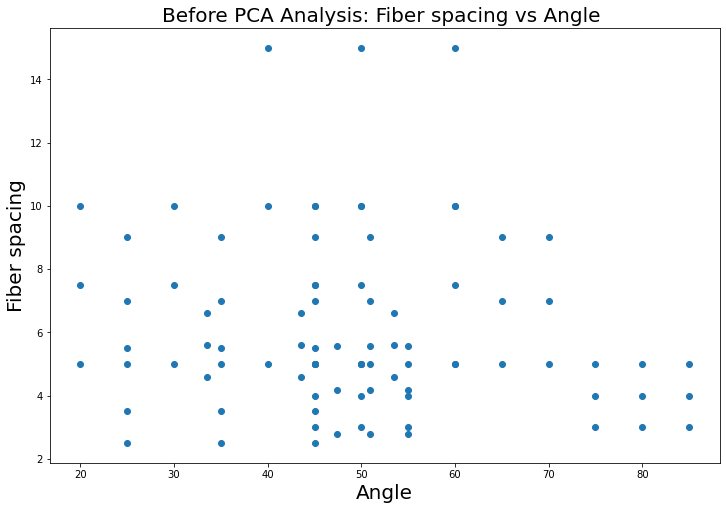

In [31]:
fig= plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Angle', fontsize = 20)
ax.set_ylabel('Fiber spacing', fontsize = 20)
ax.set_title('Before PCA Analysis: Fiber spacing vs Angle ', fontsize= 20)

plt.plot(df.iloc[:,0],df.iloc[:,1], 'o');

NameError: name 'ff' is not defined

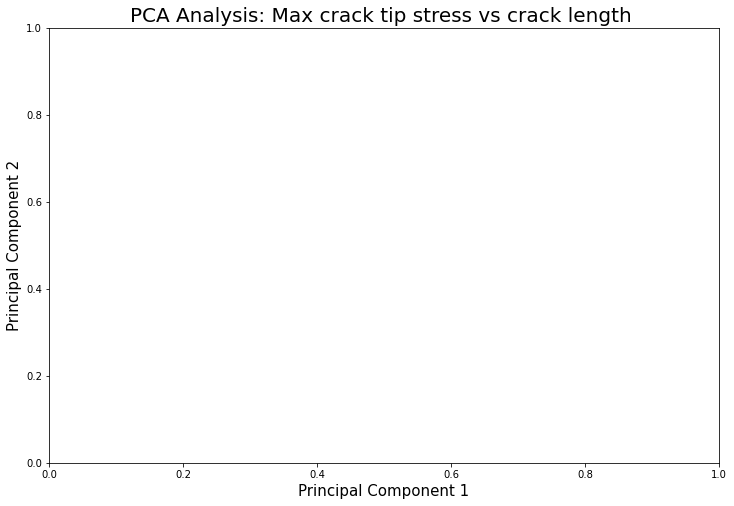

In [27]:
fig= plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Analysis: Max crack tip stress vs crack length ', fontsize= 20)

plt.plot(df.iloc[:,0], ff.iloc[:,1], 'o');